<a href="https://colab.research.google.com/github/sharfiyas/Network-intrution-detetion-system/blob/main/NETWORK_INTRUSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

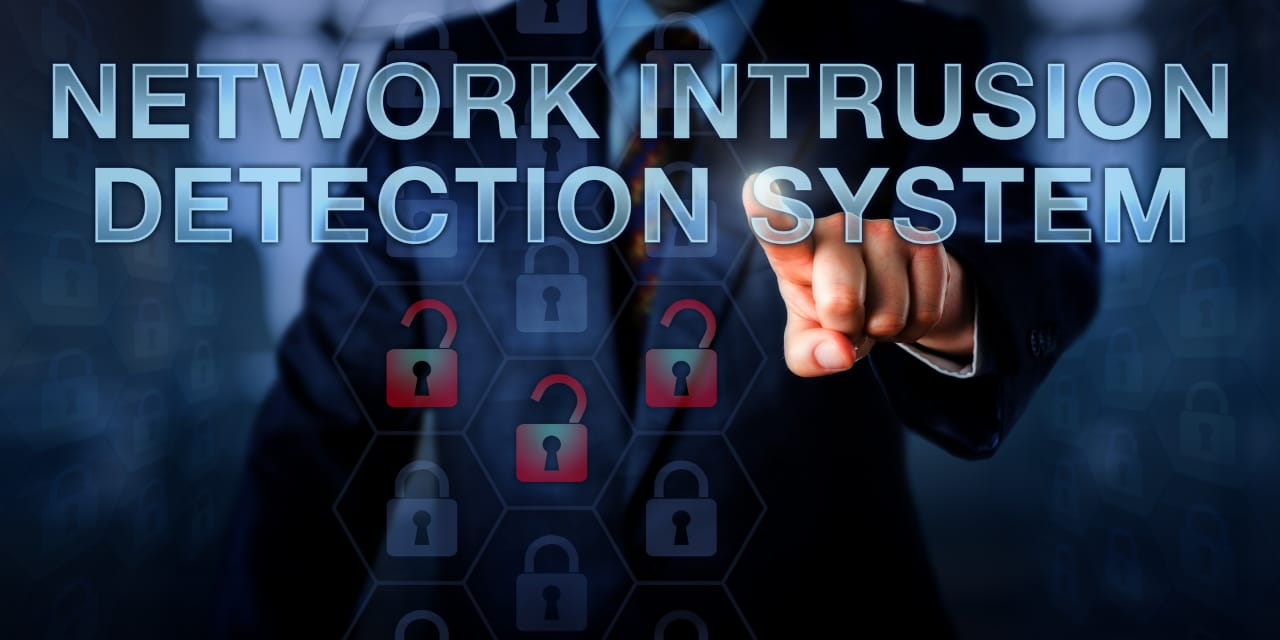

#**NETWORK INTRUSION DETECTION SYSTEM**
# #**Aim -** Predicting whether a network connection is normal or anomalous

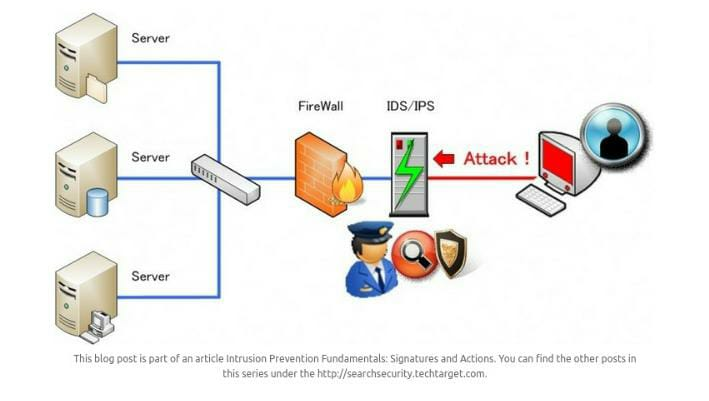

# #**About the data set -**
# The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.
#For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
#• Normal
#• Anomalous
#**Features**
#1.duration - Length (in seconds) of the connection.
#2.protocol_type - Type of network protocol used in the connection (e.g., TCP, UDP, ICMP).
#3.service - Network service on the destination host (e.g., http, ftp, telnet).
#4.flag - Status of the connection (e.g., FIN, SYN, RST).
#5.src_bytes - Number of bytes sent from source to destination.
#6.dst_bytes - Number of bytes sent from destination to source.
#7.land - 1 if connection is from/to the same host/port; 0 otherwise.
#8.wrong_fragment - Number of "wrong" fragments in the connection.
#9.urgent - Number of urgent packets in the connection.
#10.hot - Number of "hot" indicators in the connection.
#11.num_failed_logins - Number of failed login attempts.
#12.logged_in - 1 if successfully logged in; 0 otherwise.
#13.num_compromised - Number of compromised conditions.
#14.root_shell - 1 if root shell is obtained; 0 otherwise.
#15.su_attempted - 1 if “su root” command attempted; 0 otherwise.
#16.num_root - Number of "root" accesses.
#17.num_file_creations - Number of file creation operations.
#18.num_shells - Number of shell prompts.
#19.num_access_files - Number of access control files.
#20.num_outbound_cmds - Number of outbound commands executed.
#21.is_host_login - Indicates whether login is a "host" login.
#22.is_guest_login - 1 if the login is a “guest”login; 0 otherwise.
#23.count - number of connections to the same host as the current connection in the past two seconds.
#24.srv_count - number of connections to the same service as the current connection in the past two seconds.
#25.serror_rate - Percentage of connections that have "SYN" errors.
#26.srv_serror_rate - Percentage of connections to the same service that have "SYN" errors.
#27.rerror_rate - Percentage of connections that have "REJ" errors.
#28.srv_rerror_rate - Percentage of connections to the same service that have "REJ" errors.
#29.same_srv_rate - Percentage of connections to the same service.
#30.diff_srv_rate - Percentage of connections to different services.
#31.srv_diff_host_rate - Percentage of connections to different hosts.
#32.dst_host_count - Number of connections to the same destination host as the current connection.
#33.dst_host_srv_count - Number of connections to the same destination service as the current connection.
#34.dst_host_same_srv_rate - Percentage of connections to the same destination service.
#35.dst_host_diff_srv_rate - Percentage of connections to different destination services.
#36.dst_host_same_src_port_rate - Percentage of connections from the same source port.
#37.dst_host_srv_diff_host_rate - Percentage of connections to different hosts from the same destination host as the current connection.
#38.dst_host_serror_rate - Percentage of connections that have "SYN" errors to the same destination host.
#39.dst_host_srv_serror_rate - Percentage of connections to the same service that have "SYN" errors to the same destination host.
#40.dst_host_rerror_rate - Percentage of connections that have "REJ" errors to the same destination host.
#41.dst_host_srv_rerror_rate - Percentage of connections to the same service that have "REJ" errors to the same destination host.

**LOADING THE DATA SET**

**IMPORTING THE LIBBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Train_data1.csv')
df

<ipython-input-788-70ab179bca34>:5: DtypeWarning: Columns (7,14,15,16,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Train_data1.csv')


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491,0.0,0,zero,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146,0.0,0,zero,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0,0.0,0,zero,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232,8153.0,0,zero,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199,420.0,0,zero,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,tcp,exec,RSTO,0,0.0,0,0,0.0,0.0,...,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0.0,tcp,ftp_data,SF,334,0.0,0,0,0.0,0.0,...,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0.0,tcp,private,REJ,0,0.0,0,0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0.0,tcp,nnsp,S0,0,0.0,0,0,0.0,0.0,...,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491,0.0,0,zero,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146,0.0,0,zero,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0,0.0,0,zero,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232,8153.0,0,zero,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199,420.0,0,zero,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0.0,tcp,exec,RSTO,0,0.0,0,0,0.0,0.0,...,7.0,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0.0,tcp,ftp_data,SF,334,0.0,0,0,0.0,0.0,...,39.0,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0.0,tcp,private,REJ,0,0.0,0,0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0.0,tcp,nnsp,S0,0,0.0,0,0,0.0,0.0,...,20.0,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0.0,tcp,finger,S0,0,0.0,0,0,0.0,0.0,...,49.0,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [ ]:
df.shape

(25192, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25171 non-null  float64
 1   protocol_type                25172 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25183 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25179 non-null  float64
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25154 non-null  object 
 8   urgent                       25177 non-null  float64
 9   hot                          25175 non-null  float64
 10  num_failed_logins            25165 non-null  float64
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25178 non-null  float64
 13  root_shell      

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25171.000000,2.519200e+04,2.517900e+04,25192.000000,25177.000000,25175.000000,25165.000000,25192.000000,25178.000000,25192.000000,...,25177.000000,25191.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.308609,2.433063e+04,3.493650e+03,0.000079,0.000040,0.198173,0.001192,0.394768,0.227977,0.001548,...,182.488899,115.057481,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2687.661683,2.410805e+06,8.885361e+04,0.008910,0.006302,2.154923,0.045443,0.488811,10.420247,0.039316,...,99.007572,110.645534,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.315000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,1.000000,77.000000,4.000000,1.000000,884.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include='object')

,protocol_type,service,flag,wrong_fragment,su_attempted,num_root,num_file_creations,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,class
count,25172,25192,25183,25154,25192,25192,25192,25192,25192,25180,25178,25192
unique,3,66,11,7,7,36,28,12,3,3,5,2
top,tcp,http,SF,0,0,0,0,0,0,0,0,normal
freq,20508,8003,14964,13060,16348,16254,16249,16295,16334,16165,16128,13449


In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


**MISSING VALUE**

In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

duration: 21 (0.083%)
protocol_type: 20 (0.079%)
flag: 9 (0.036%)
dst_bytes: 13 (0.052%)
wrong_fragment: 38 (0.151%)
urgent: 15 (0.06%)
hot: 17 (0.067%)
num_failed_logins: 27 (0.107%)
num_compromised: 14 (0.056%)
is_host_login: 12 (0.048%)
is_guest_login: 14 (0.056%)
srv_rerror_rate: 17 (0.067%)
dst_host_count: 15 (0.06%)
dst_host_srv_count: 1 (0.004%)


In [ ]:
df.isna().sum()

duration                       21
protocol_type                  20
service                         0
flag                            9
src_bytes                       0
dst_bytes                      13
land                            0
wrong_fragment                 38
urgent                         15
hot                            17
num_failed_logins              27
logged_in                       0
num_compromised                14
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_host_login                  12
is_guest_login                 14
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                17
same_srv_rate                   0
diff_srv_rate 

In [ ]:
for i in df:
  print(i)
  print('\n')
  print(df[i].value_counts())
  print('.'*50)

duration


duration
0.0        23147
1.0          374
2.0          165
3.0          102
4.0           75
           ...  
17025.0        1
12892.0        1
584.0          1
10774.0        1
322.0          1
Name: count, Length: 758, dtype: int64
..................................................
protocol_type


protocol_type
tcp     20508
udp      3011
icmp     1653
Name: count, dtype: int64
..................................................
service


service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
..................................................
flag


flag
SF        14964
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
...................................

**DATA CLEANING**

In [ ]:
a2=df['protocol_type'].value_counts()

<Axes: xlabel='protocol_type', ylabel='count'>

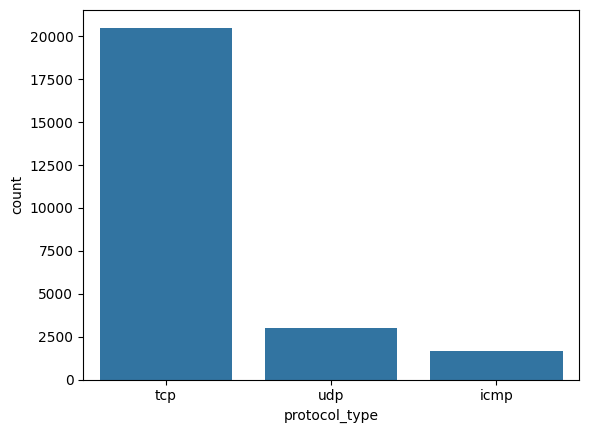

In [ ]:
sns.countplot(x='protocol_type',data=df)

In [ ]:
a8=df['wrong_fragment'].value_counts()
a8

wrong_fragment
0       13060
0        8725
zero     3177
3          90
3          70
1          19
1          13
Name: count, dtype: int64

In [ ]:
#removing str
df['wrong_fragment']=df['wrong_fragment'].str.replace('zero','0')

In [ ]:
df['wrong_fragment']=df['wrong_fragment'].astype(float)

In [ ]:
a8=df['wrong_fragment'].value_counts()
a8

wrong_fragment
0.0    16237
3.0       90
1.0       19
Name: count, dtype: int64

In [ ]:
a9=df['urgent'].value_counts()
a9

urgent
0.0    25176
1.0        1
Name: count, dtype: int64

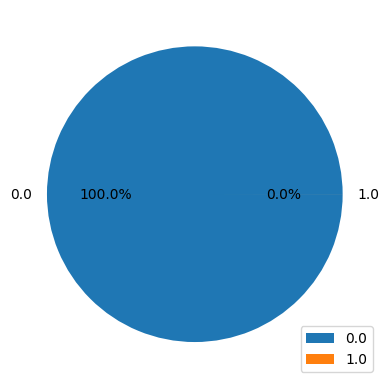

In [ ]:
plt.pie(a9,autopct='%1.1f%%',labels=a9.index) #100% values are 0
plt.legend(loc='lower right')

In [ ]:
b3=df['logged_in'].value_counts()
b3

logged_in
0    15247
1     9945
Name: count, dtype: int64

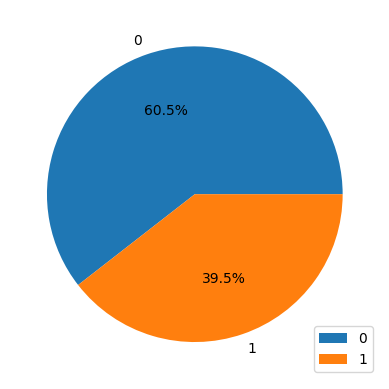

In [ ]:
plt.pie(b3,autopct='%1.1f%%',labels=b3.index)
plt.legend(loc='lower right')

In [ ]:
b6=df['su_attempted'].value_counts()
b6

su_attempted
0       16348
0        8798
zero       25
2           7
2           6
1           5
1           3
Name: count, dtype: int64

In [ ]:
#removing str
df['su_attempted']=df['su_attempted'].str.replace('zero','0')
df['su_attempted']=df['su_attempted'].astype(float)

In [ ]:
b6=df['su_attempted'].value_counts()
b6

su_attempted
0.0    16373
2.0        6
1.0        5
Name: count, dtype: int64

In [ ]:
b7=df['num_root'].value_counts()
b7

num_root
0       16254
0        8758
zero       46
1          33
9          15
1          14
6          12
6          11
9           9
2           7
5           4
2           3
4           2
5           2
3           1
572         1
191         1
91          1
247         1
146         1
975         1
867         1
629         1
417         1
7           1
179         1
3           1
38          1
151         1
121         1
512         1
100         1
14          1
54          1
10          1
508         1
Name: count, dtype: int64

In [ ]:
df['num_root']=df['num_root'].str.replace('zero','0')

In [ ]:
df['num_root']=df['num_root'].astype(float)

In [ ]:
b7=df['num_root'].value_counts()

In [ ]:
b8=df['num_file_creations'].value_counts()
b8

num_file_creations
0       16249
0        8783
zero       94
1          25
1          12
2           4
2           3
4           2
38          1
8           1
11          1
20          1
5           1
3           1
40          1
4           1
21          1
17          1
5           1
14          1
6           1
18          1
19          1
29          1
13          1
15          1
8           1
18          1
Name: count, dtype: int64

In [ ]:
df['num_file_creations']=df['num_file_creations'].str.replace('zero','0')

In [ ]:
df['num_file_creations']=df['num_file_creations'].astype(float)

In [ ]:
b8=df['num_file_creations'].value_counts()

In [ ]:
b9=df['num_shells'].value_counts()

In [ ]:
c1=df['num_access_files'].value_counts()
c1

num_access_files
0       16295
0        8781
1          46
zero       37
1          19
2           5
2           3
3           2
5           1
4           1
8           1
5           1
Name: count, dtype: int64

In [ ]:
df['num_access_files']=df['num_access_files'].str.replace('zero','0')
df['num_access_files']=df['num_access_files'].astype(float)

In [ ]:
c1=df['num_access_files'].value_counts()
c1

num_access_files
0.0    16332
1.0       46
2.0        3
3.0        2
5.0        1
Name: count, dtype: int64

In [ ]:
c2=df['num_outbound_cmds'].value_counts() #all values are zero
c2

num_outbound_cmds
0       16334
0        8808
zero       50
Name: count, dtype: int64

In [ ]:
c3=df['is_host_login'].value_counts() #all the values are zero
c3

is_host_login
0       16165
0        8808
zero      207
Name: count, dtype: int64

In [ ]:
df['is_host_login']=df['is_host_login'].str.replace('zero','0')
df['is_host_login']=df['is_host_login'].astype(float)

In [ ]:
c3=df['is_host_login'].value_counts() #all the values are zero
c3

is_host_login
0.0    16372
Name: count, dtype: int64

In [ ]:
c4=df['is_guest_login'].value_counts()
c4

is_guest_login
0       16128
0        8743
1         165
zero       77
1          65
Name: count, dtype: int64

In [ ]:
df['is_guest_login']=df['is_guest_login'].str.replace('zero','0')
df['is_guest_login']=df['is_guest_login'].astype(float)

In [ ]:
d1=df['rerror_rate'].value_counts()
d1

rerror_rate
0.00    21985
1.00     2552
0.90       43
0.89       39
0.91       38
        ...  
0.09        1
0.44        1
0.21        1
0.32        1
0.57        1
Name: count, Length: 72, dtype: int64

In [ ]:
d5=df['class'].value_counts()
d5

class
normal     13449
anomaly    11743
Name: count, dtype: int64

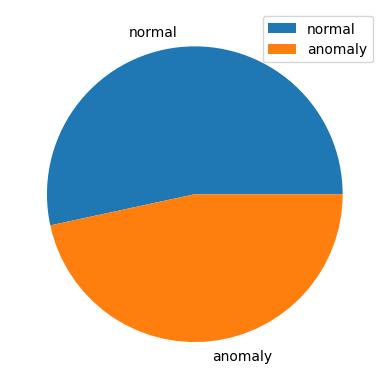

In [ ]:
plt.pie(d5,labels=d5.index)
plt.legend(loc='upper right')

In [ ]:
df.drop(['num_outbound_cmds','is_host_login'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

duration                         21
protocol_type                    20
service                           0
flag                              9
src_bytes                         0
dst_bytes                        13
land                              0
wrong_fragment                 8846
urgent                           15
hot                              17
num_failed_logins                27
logged_in                         0
num_compromised                  14
root_shell                        0
su_attempted                   8808
num_root                       8808
num_file_creations             8808
num_shells                        0
num_access_files               8808
is_guest_login                 8822
count                             0
srv_count                         0
serror_rate                       0
srv_serror_rate                   0
rerror_rate                       0
srv_rerror_rate                  17
same_srv_rate                     0
diff_srv_rate               

In [ ]:
df.shape

(25192, 40)

In [ ]:
#filling missing values
df['duration'].fillna(df['duration'].mode()[0],inplace=True)
df['protocol_type'].fillna(df['protocol_type'].mode()[0],inplace=True)
df['flag'].fillna(df['flag'].mode()[0],inplace=True)
df['hot'].fillna(df['hot'].mode()[0],inplace=True)
df['num_compromised'].fillna(df['num_compromised'].mode()[0],inplace=True)
df['su_attempted'].fillna(df['su_attempted'].mode()[0],inplace=True)
df['num_root'].fillna(df['num_root'].mode()[0],inplace=True)
df['num_file_creations'].fillna(df['num_file_creations'].mode()[0],inplace=True)
df['num_access_files'].fillna(df['num_access_files'].mode()[0],inplace=True)
df['is_guest_login'].fillna(df['is_guest_login'].mode()[0],inplace=True)
df['srv_rerror_rate'].fillna(df['srv_rerror_rate'].mode()[0],inplace=True)

df['dst_bytes'].fillna(df['dst_bytes'].mode()[0],inplace=True)
df['wrong_fragment'].fillna(df['wrong_fragment'].mode()[0],inplace=True)
df['urgent'].fillna(df['urgent'].mode()[0],inplace=True)
df['num_failed_logins'].fillna(df['num_failed_logins'].mode()[0],inplace=True)
df['srv_diff_host_rate'].fillna(df['srv_diff_host_rate'].mode()[0],inplace=True)
df['dst_host_count'].fillna(df['dst_host_count'].mode()[0],inplace=True)
df['dst_host_srv_count'].fillna(df['dst_host_srv_count'].mode()[0],inplace=True)
df['dst_host_same_srv_rate'].fillna(df['dst_host_same_srv_rate'].mode()[0],inplace=True)
df['dst_host_diff_srv_rate'].fillna(df['dst_host_diff_srv_rate'].mode()[0],inplace=True)
df['dst_host_same_src_port_rate'].fillna(df['dst_host_same_src_port_rate'].mode()[0],inplace=True)
df['dst_host_srv_diff_host_rate'].fillna(df['dst_host_srv_diff_host_rate'].mode()[0],inplace=True)
df['dst_host_serror_rate'].fillna(df['dst_host_serror_rate'].median(),inplace=True)
df['dst_host_srv_serror_rate'].fillna(df['dst_host_srv_serror_rate'].mode()[0],inplace=True)
df['dst_host_rerror_rate'].fillna(df['dst_host_rerror_rate'].mode()[0],inplace=True)
df['dst_host_srv_rerror_rate'].fillna(df['dst_host_srv_rerror_rate'].mode()[0],inplace=True)
df['class'].fillna(df['class'].mode()[0],inplace=True)

In [ ]:
df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                      float64
land                             int64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                        int64
num_compromised                float64
root_shell                       int64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                       int64
num_access_files               float64
is_guest_login                 float64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [ ]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

**HISTOGRAM FOR FEATURES**

Text(0, 0.5, 'count')

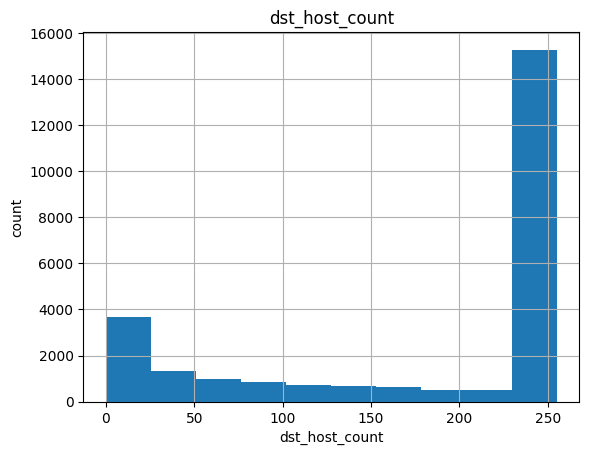

In [ ]:
ax=df.hist(column='dst_host_count')
plt.xlabel('dst_host_count')
plt.ylabel('count')

Text(0.5, 1.0, 'protocol_type/ count')

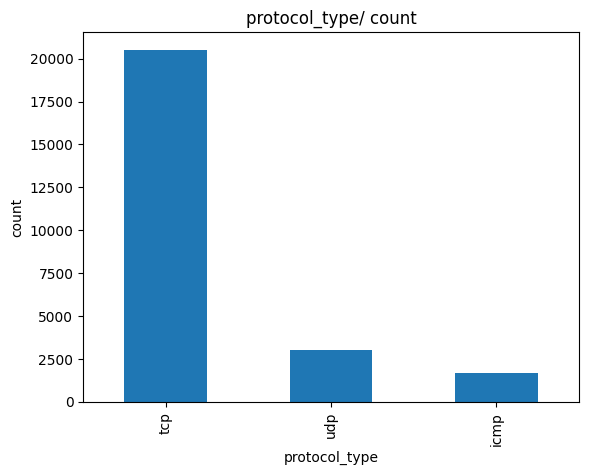

In [ ]:
df['protocol_type'].value_counts().plot(kind="bar")
plt.xlabel('protocol_type')
plt.ylabel('count')
plt.title('protocol_type/ count')

<Axes: xlabel='protocol_type'>

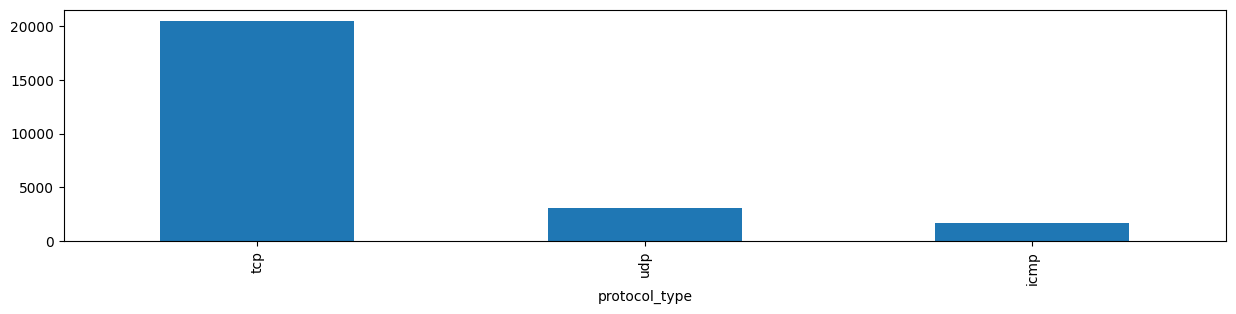

In [ ]:
plt.figure(figsize=(15,3))
df['protocol_type'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'flag/ count')

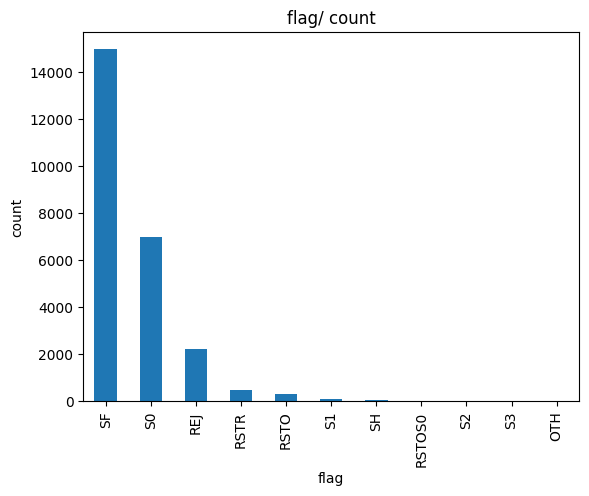

In [ ]:
plt.figsize=(15,3)
df['flag'].value_counts().plot(kind="bar")
plt.xlabel('flag')
plt.ylabel('count')
plt.title('flag/ count')

Text(0.5, 1.0, 'logged in/ count')

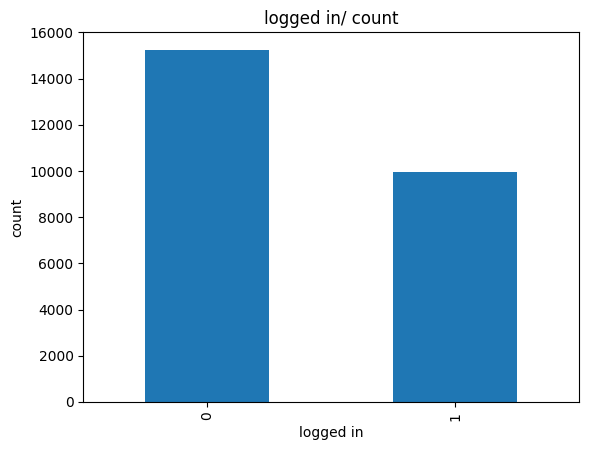

In [ ]:
plt.figsize=(15,3)
df['logged_in'].value_counts().plot(kind="bar")
plt.xlabel('logged in')
plt.ylabel('count')
plt.title('logged in/ count')

Text(0.5, 1.0, 'class count')

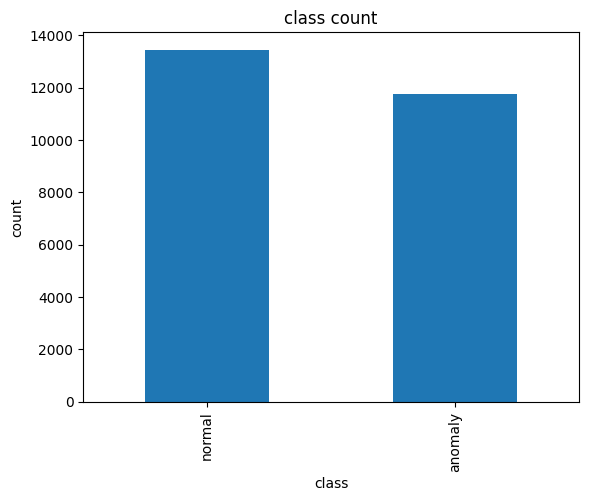

In [ ]:
plt.figsize=(15,3)
df['class'].value_counts().plot(kind="bar")
plt.xlabel('class')
plt.ylabel('count')
plt.title('class count')

dst host count has most of the values greater than 225.

Text(0, 0.5, 'count')

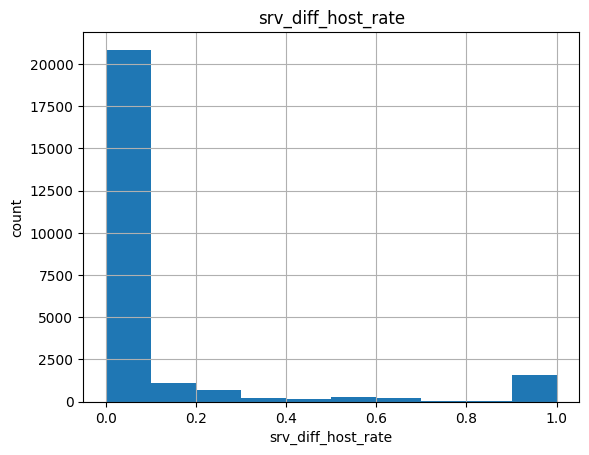

In [ ]:
ax=df.hist(column='srv_diff_host_rate')
plt.xlabel('srv_diff_host_rate')
plt.ylabel('count')

Most of the times srv_diff_host_rate is less than 0.2




**ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,19,9,491,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,2,41,9,146,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,1,46,5,0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,1,22,9,232,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,1,22,9,199,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,1,16,2,0,0.0,0,0.0,0.0,0.0,...,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0.0,1,19,9,334,0.0,0,0.0,0.0,0.0,...,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0.0,1,46,1,0,0.0,0,0.0,0.0,0.0,...,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0.0,1,38,5,0,0.0,0,0.0,0.0,0.0,...,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


**OUTLIERS**

In [ ]:
def detect_outliers_iqr_feature(df,feature):
  feature_data=df[feature]
  Q1=np.percentile(feature_data,25)
  Q3=np.percentile(feature_data,75)
  iqr=Q3-Q1
  lower_bound=Q1-1.5*iqr
  upperbound=Q3+1.5*iqr
  outliers=np.where((feature_data<lower_bound)|(feature_data>upperbound))[0]

In [ ]:
feature_name=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','urgent', \
              'num_failed_logins','logged_in','root_shell', \
              'num_shells','count','srv_count','serror_rate','srv_serror_rate','rerror_rate', \
              'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count', \
              'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate', \
              'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate', \
              'dst_host_serror_rate', 'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']
for i in feature_name:
 outliers=detect_outliers_iqr_feature(df,i)
 print("Outliers are present in",i,":",outliers)

Outliers are present in duration : None
Outliers are present in protocol_type : None
Outliers are present in service : None
Outliers are present in flag : None
Outliers are present in src_bytes : None
Outliers are present in dst_bytes : None
Outliers are present in land : None
Outliers are present in urgent : None
Outliers are present in num_failed_logins : None
Outliers are present in logged_in : None
Outliers are present in root_shell : None
Outliers are present in num_shells : None
Outliers are present in count : None
Outliers are present in srv_count : None
Outliers are present in serror_rate : None
Outliers are present in srv_serror_rate : None
Outliers are present in rerror_rate : None
Outliers are present in same_srv_rate : None
Outliers are present in diff_srv_rate : None
Outliers are present in srv_diff_host_rate : None
Outliers are present in dst_host_count : None
Outliers are present in dst_host_srv_count : None
Outliers are present in dst_host_same_srv_rate : None
Outliers 

In [ ]:
x_train=df.drop(['class'],axis=1)
x_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,1,19,9,491,0.0,0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,2,41,9,146,0.0,0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,1,46,5,0,0.0,0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1,22,9,232,8153.0,0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1,22,9,199,420.0,0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,1,16,2,0,0.0,0,0.0,0.0,0.0,...,255.0,7.0,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0.0,1,19,9,334,0.0,0,0.0,0.0,0.0,...,1.0,39.0,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0.0,1,46,1,0,0.0,0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0.0,1,38,5,0,0.0,0,0.0,0.0,0.0,...,255.0,20.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
y_train=df['class']
y_train

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

**CORRILATION -HEAT MAP**


In [ ]:
x_train.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.036409,0.101301,-0.066634,0.084864,0.013258,-0.001012,-0.007195,-0.000486,0.004202,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
protocol_type,0.036409,1.000000,0.025136,0.095089,-0.001288,-0.004743,-0.001125,0.121946,-0.000796,-0.011609,...,0.238035,0.104178,0.004997,0.131559,-0.205673,-0.359801,-0.080571,-0.079222,-0.018500,-0.047263
service,0.101301,0.025136,1.000000,-0.295491,0.008554,-0.013782,-0.006896,0.060973,0.011325,-0.056165,...,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865
flag,-0.066634,0.095089,-0.295491,1.000000,-0.006599,0.027606,-0.006593,0.047716,0.004744,0.067027,...,-0.319355,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075
src_bytes,0.084864,-0.001288,0.008554,-0.006599,1.000000,0.003611,-0.000090,-0.000636,-0.000062,0.000995,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,-0.004743,-0.013782,0.027606,0.003611,1.000000,-0.000350,-0.002491,0.000345,0.002539,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.001125,-0.006896,-0.006593,-0.000090,-0.000350,1.000000,-0.000565,-0.000056,-0.000819,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.007195,0.121946,0.060973,0.047716,-0.000636,-0.002491,-0.000565,1.000000,-0.000399,-0.005825,...,0.029911,-0.029648,-0.033836,0.045116,0.027252,-0.015314,-0.037207,-0.039754,0.026628,-0.023717
urgent,-0.000486,-0.000796,0.011325,0.004744,-0.000062,0.000345,-0.000056,-0.000399,1.000000,0.002346,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,-0.011609,-0.056165,0.067027,0.000995,0.002539,-0.000819,-0.005825,0.002346,1.000000,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719


<Axes: >

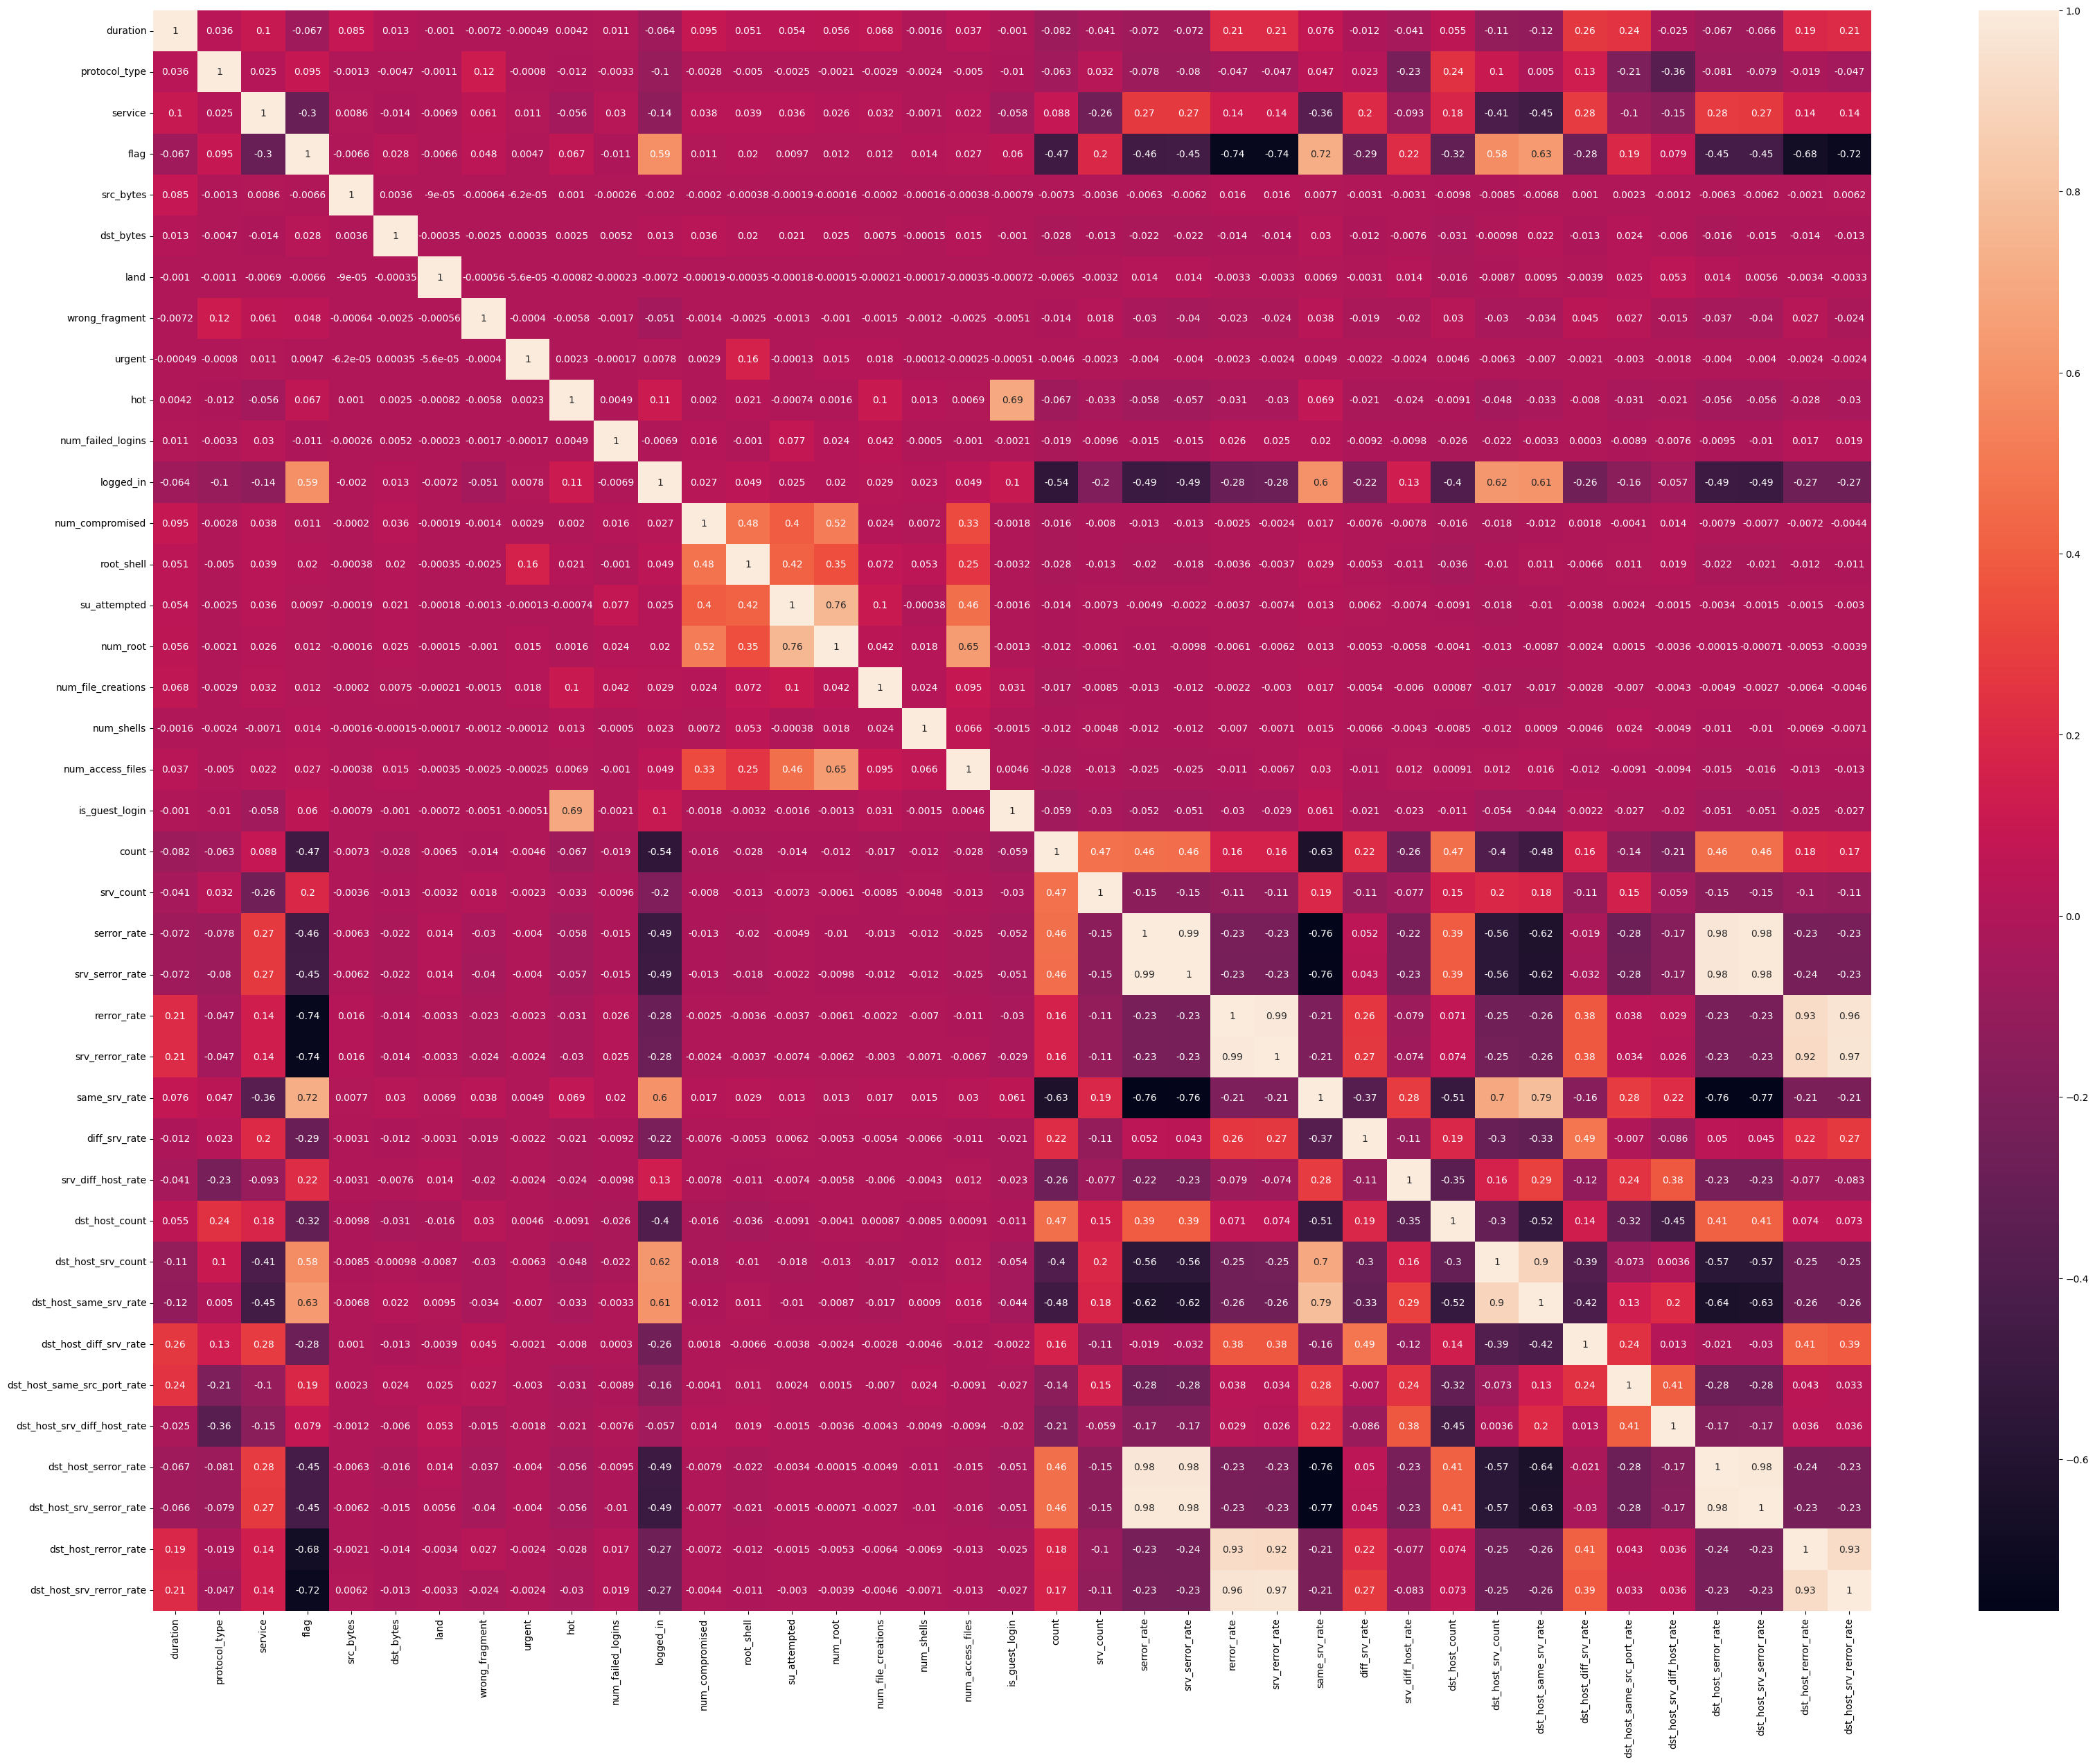

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(x_train.corr(),annot=True)

**Testing data**

In [ ]:
df1=pd.read_csv('/content/Test_data1.csv')
df1

<ipython-input-854-f2e11f4453fb>:1: DtypeWarning: Columns (6,7,10,11,13,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/Test_data1.csv')


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0.0,0,0,0,0,...,255.0,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0.0,0,0,0,0,...,255.0,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0.0,0,0,0,0,...,134.0,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0.0,0,0,0,0,...,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15.0,0,0,0,0,...,29.0,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333.0,NaN,NaN,NaN,NaN,...,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938.0,NaN,NaN,NaN,NaN,...,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314.0,NaN,NaN,NaN,2,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42.0,NaN,NaN,NaN,0,...,255.0,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
df1.shape

(22544, 41)

In [ ]:
df1.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                      float64
land                            object
wrong_fragment                  object
urgent                          object
hot                             object
num_failed_logins               object
logged_in                       object
num_compromised                 object
root_shell                      object
su_attempted                    object
num_root                        object
num_file_creations              object
num_shells                      object
num_access_files                object
num_outbound_cmds               object
is_host_login                   object
is_guest_login                  object
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
for i in df1:
  print(i)
  print('\n')
  print(df1[i].value_counts())
  print('.'*50)

duration


duration
0       19018
1         587
4         539
282       240
280       216
        ...  
948         1
7280        1
8233        1
111         1
8209        1
Name: count, Length: 624, dtype: int64
..................................................
protocol_type


protocol_type
tcp     18875
udp      2621
icmp     1043
Name: count, dtype: int64
..................................................
service


service
http       7831
private    4773
telnet     1625
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: count, Length: 64, dtype: int64
..................................................
flag


flag
SF        14870
REJ        3850
S0         2012
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: count, dtype: int64
..................................................
src_bytes


src_bytes
0        7626
1  

In [ ]:
f1=df1['land'].value_counts()

In [ ]:
df1['land']=df1['land'].str.replace('zero','1')
df1['land']=df1['land'].astype(float)

In [ ]:
f2=df1['wrong_fragment'].value_counts()

In [ ]:
df1['wrong_fragment']=df1['wrong_fragment'].str.replace('zero','0')
df1['wrong_fragment']=df1['wrong_fragment'].str.replace('one','1')
df1['wrong_fragment']=df1['wrong_fragment'].astype(float)

In [ ]:
f3=df1['urgent'].value_counts()
f3

urgent
0       22313
zero       79
1           5
2           4
3           1
Name: count, dtype: int64

In [ ]:
df1['urgent']=df1['urgent'].str.replace('zero','0')
df1['urgent']=df1['urgent'].astype(float)

In [ ]:
f4=df1['hot'].value_counts()
f4

hot
0       21457
2         846
1          90
zero       51
4          20
3          12
5          11
7           9
6           6
18          3
22          2
10          2
30          2
11          1
19          1
101         1
15          1
Name: count, dtype: int64

In [ ]:
df1['hot']=df1['hot'].str.replace('zero','0')
df1['hot']=df1['hot'].astype(float)

In [ ]:
f5=df1['num_failed_logins'].value_counts()

In [ ]:
df1['num_failed_logins']=df1['num_failed_logins'].str.replace('zero','0')
df1['num_failed_logins']=df1['num_failed_logins'].astype(float)

In [ ]:
g9=df1['logged_in'].value_counts()
g9

logged_in
0      9134
1      7250
0      3441
1      2713
one       6
Name: count, dtype: int64

In [ ]:
df1['logged_in']=df1['logged_in'].str.replace('one','1')
df1['logged_in']=df1['logged_in'].astype(float)

In [ ]:
f6=df1['num_compromised'].value_counts()
f6

num_compromised
0       21968
1         325
zero      102
2          11
4           4
8           4
3           3
5           3
14          2
49          2
6           2
57          1
23          1
36          1
9           1
796         1
25          1
381         1
10          1
15          1
11          1
165         1
611         1
7           1
Name: count, dtype: int64

In [ ]:
df1['num_compromised']=df1['num_compromised'].str.replace('zero','0')
df1['num_compromised']=df1['num_compromised'].astype(float)

In [ ]:
f7=df1['su_attempted'].value_counts()
f7

su_attempted
0       22362
zero      153
2           2
1           2
Name: count, dtype: int64

In [ ]:
df1['su_attempted']=df1['su_attempted'].str.replace('zero','0')
df1['su_attempted']=df1['su_attempted'].astype(float)

In [ ]:
f8=df1['num_root'].value_counts()
f8

num_root
0       22379
zero       59
1          14
3           7
4           6
2           4
7           2
8           2
17          1
173         1
23          1
684         1
145         1
26          1
401         1
878         1
31          1
9           1
45          1
51          1
5           1
Name: count, dtype: int64

In [ ]:
df1['num_root']=df1['num_root'].str.replace('zero','0')
df1['num_root']=df1['num_root'].astype(float)

In [ ]:
e5=df1['num_file_creations'].value_counts()
e5

num_file_creations
0       22364
zero       99
1          17
2           9
4           6
3           5
5           2
100         1
6           1
7           1
Name: count, dtype: int64

In [ ]:
df1['num_file_creations']=df1['num_file_creations'].str.replace('zero','0')

In [ ]:
df1['num_file_creations']=df1['num_file_creations'].astype(float)

In [ ]:
a10=df1['num_shells'].value_counts()
a10

num_shells
0       16372
0        6100
zero       30
1          10
1           5
2           2
5           1
2           1
Name: count, dtype: int64

In [ ]:
df1['num_shells']=df1['num_shells'].str.replace('zero','0')

In [ ]:
df1['num_shells']=df1['num_shells'].astype(float)

In [ ]:
a11=df1['num_access_files'].value_counts()
a11

num_access_files
0       16331
0        6115
1          49
zero       26
1          18
2           2
3           1
4           1
2           1
Name: count, dtype: int64

In [ ]:
df1['num_access_files']=df1['num_access_files'].str.replace('zero','0')
df1['num_access_files']=df1['num_access_files'].astype(float)

In [ ]:
a12=df1['num_outbound_cmds'].value_counts() #all values are zero
a12

num_outbound_cmds
0       16384
0        6119
zero       27
Name: count, dtype: int64

In [ ]:
df1.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [ ]:
a13=df1['is_host_login'].value_counts() #all the values are zero
a13

is_host_login
0       16378
0        6129
zero       26
1           6
1           5
Name: count, dtype: int64

In [ ]:
df1['is_host_login']=df1['is_host_login'].str.replace('zero','0')
df1['is_host_login']=df1['is_host_login'].astype(float)

In [ ]:
a14=df1['is_guest_login'].value_counts()
a14

is_guest_login
0       15918
0        5939
1         466
1         175
zero       20
Name: count, dtype: int64

In [ ]:
df1['is_guest_login']=df1['is_guest_login'].str.replace('zero','0')
df1['is_guest_login']=df1['is_guest_login'].astype(float)

In [ ]:
d6=df1['dst_host_srv_count'].value_counts()

In [ ]:
d9=df1['root_shell'].value_counts()

In [ ]:
df1['root_shell']=df1['root_shell'].str.replace('zero','0')
df1['root_shell']=df1['root_shell'].astype(float)

In [ ]:
#filling missing values
df1['protocol_type'].fillna(df1['protocol_type'].mode()[0],inplace=True)
df1['service'].fillna(df1['service'].mode()[0],inplace=True)
df1['flag'].fillna(df1['flag'].mode()[0],inplace=True)
df1['src_bytes'].fillna(df1['src_bytes'].mode()[0],inplace=True)
df1['dst_bytes'].fillna(df1['dst_bytes'].mode()[0],inplace=True)
df1['land'].fillna(df1['land'].mode()[0],inplace=True)
df1['wrong_fragment'].fillna(df1['wrong_fragment'].mode()[0],inplace=True)
df1['urgent'].fillna(df1['urgent'].mode()[0],inplace=True)
df1['hot'].fillna(df1['hot'].mode()[0],inplace=True)
df1['num_failed_logins'].fillna(df1['num_failed_logins'].mode()[0],inplace=True)
df1['logged_in'].fillna(df1['logged_in'].mode()[0],inplace=True)
df1['num_compromised'].fillna(df1['num_compromised'].mode()[0],inplace=True)
df1['root_shell'].fillna(df1['root_shell'].mode()[0],inplace=True)
df1['su_attempted'].fillna(df1['su_attempted'].mode()[0],inplace=True)
df1['num_root'].fillna(df1['num_root'].mode()[0],inplace=True)
df1['num_file_creations'].fillna(df1['num_file_creations'].mode()[0],inplace=True)
df1['num_shells'].fillna(df1['num_shells'].mode()[0],inplace=True)
df1['num_access_files'].fillna(df1['num_access_files'].mode()[0],inplace=True)
df1['is_host_login'].fillna(df1['is_host_login'].mode()[0],inplace=True)
df1['is_guest_login'].fillna(df1['is_guest_login'].mode()[0],inplace=True)
df1['count'].fillna(df1['count'].mode()[0],inplace=True)
df1['srv_count'].fillna(df1['srv_count'].mode()[0],inplace=True)
df1['serror_rate'].fillna(df1['serror_rate'].mode()[0],inplace=True)
df1['srv_serror_rate'].fillna(df1['srv_serror_rate'].mode()[0],inplace=True)
df1['rerror_rate'].fillna(df1['rerror_rate'].mode()[0],inplace=True)
df1['srv_rerror_rate'].fillna(df1['srv_rerror_rate'].mode()[0],inplace=True)
df1['same_srv_rate'].fillna(df1['same_srv_rate'].mode()[0],inplace=True)
df1['diff_srv_rate'].fillna(df1['diff_srv_rate'].mode()[0],inplace=True)
df1['srv_diff_host_rate'].fillna(df1['srv_diff_host_rate'].mode()[0],inplace=True)
df1['num_shells'].fillna(df1['num_shells'].mode()[0],inplace=True)
df1['dst_host_count'].fillna(df1['dst_host_count'].mode()[0],inplace=True)
df1['dst_host_srv_count'].fillna(df1['dst_host_srv_count'].mode()[0],inplace=True)
df1['dst_host_same_srv_rate'].fillna(df1['dst_host_same_srv_rate'].mode()[0],inplace=True)
df1['dst_host_diff_srv_rate'].fillna(df1['dst_host_diff_srv_rate'].mode()[0],inplace=True)
df1['dst_host_same_src_port_rate'].fillna(df1['dst_host_same_src_port_rate'].mode()[0],inplace=True)
df1['dst_host_srv_diff_host_rate'].fillna(df1['dst_host_srv_diff_host_rate'].mode()[0],inplace=True)
df1['dst_host_serror_rate'].fillna(df['dst_host_serror_rate'].median(),inplace=True)
df1['dst_host_srv_serror_rate'].fillna(df1['dst_host_srv_serror_rate'].mode()[0],inplace=True)
df1['dst_host_srv_rerror_rate'].fillna(df1['dst_host_srv_rerror_rate'].mode()[0],inplace=True)
df1['dst_host_rerror_rate'].fillna(df1['dst_host_rerror_rate'].mode()[0],inplace=True)

In [ ]:
df1.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [ ]:
df1.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
is_host_login                  float64
is_guest_login                 float64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df1['protocol_type']=lab.fit_transform(df1['protocol_type'])
df1['service']=lab.fit_transform(df1['service'])
df1['flag']=lab.fit_transform(df1['flag'])
df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0.0,0.0,0.0,0.0,0.0,...,255.0,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,1,45,1,0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,1,19,9,12983,0.0,0.0,0.0,0.0,0.0,...,134.0,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,0,13,9,20,0.0,0.0,0.0,0.0,0.0,...,3.0,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,1,55,2,0,15.0,0.0,0.0,0.0,0.0,...,29.0,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333.0,0.0,0.0,0.0,0.0,...,100.0,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,1,22,9,317,938.0,0.0,0.0,0.0,0.0,...,197.0,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,1,22,9,54540,8314.0,0.0,0.0,0.0,2.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,2,11,9,42,42.0,0.0,0.0,0.0,0.0,...,255.0,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
x_test=df1.drop(['is_host_login'],axis=1)

In [ ]:
x_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

**FEATURE SELECTION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [ ]:
x_train=x_train[selected_features]

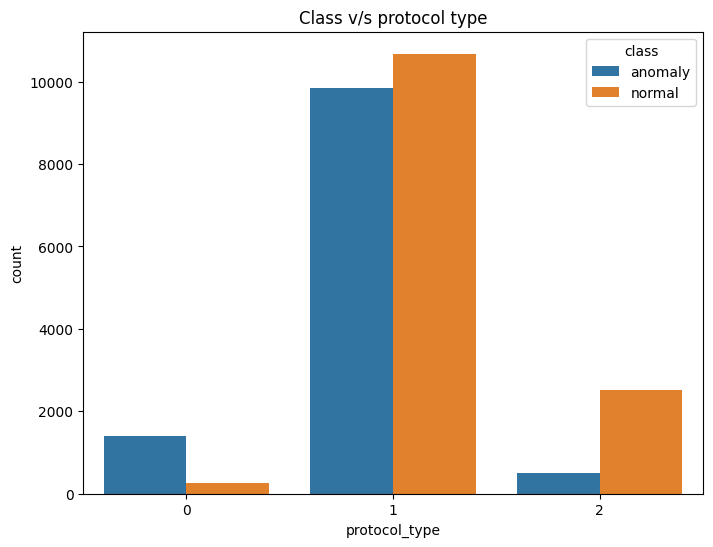

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', hue='class', data=df)
plt.title('Class v/s protocol type')
plt.show()

**Normalising**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**SPLITTING INTO TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train, y_train,test_size=0.30,random_state=42)
x_train

array([[-0.12627706,  1.09035951, -0.73992391, ...,  0.09878073,
        -1.03089514, -1.15783086],
       [-0.12627706, -0.83824459, -1.85963257, ..., -0.01323494,
        -1.00378131, -1.11328098],
       [-0.12627706, -1.67397304, -2.23286879, ...,  0.04277289,
        -0.91340189, -1.04645617],
       ...,
       [-0.12627706, -0.45252377, -2.23286879, ...,  0.04277289,
        -0.98570542, -1.11328098],
       [-0.12627706, -0.45252377,  0.75302096, ..., -0.34928194,
         1.26474221,  1.06966306],
       [-0.12627706,  1.09035951, -0.73992391, ..., -0.06924277,
        -1.00378131, -1.11328098]])

In [ ]:
x_test

array([[-2.46881883, -0.9668182 ,  0.75302096, ..., -0.34928194,
         1.26474221,  1.06966306],
       [-0.12627706, -0.45252377, -2.23286879, ..., -0.34928194,
         0.12596148,  1.06966306],
       [-0.12627706,  1.09035951, -0.73992391, ..., -0.01323494,
        -1.01281925, -1.13555592],
       ...,
       [ 2.21626471,  1.09035951,  0.75302096, ...,  3.40324291,
         1.21051455,  1.02511318],
       [-0.12627706,  0.25463107, -0.73992391, ..., -0.01323494,
        -1.01281925, -1.13555592],
       [-0.12627706, -1.73825984, -0.73992391, ..., -0.01323494,
        -0.93147777, -1.04645617]])

In [ ]:
y_train.value_counts()

class
normal     9407
anomaly    8227
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

class
normal     4042
anomaly    3516
Name: count, dtype: int64

**Model Training and Check Accuracy Score, Print Classification Report and ConfusionMatricsDisplay**
**PRECTING THE OUTPUT**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn import tree

**KNeighbors ClassifierKNN**

Model= KNeighborsClassifier(n_neighbors=11)
Accuracy score= 0.9814765811061127
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9771    0.9832    0.9802      3516
      normal     0.9853    0.9800    0.9826      4042

    accuracy                         0.9815      7558
   macro avg     0.9812    0.9816    0.9814      7558
weighted avg     0.9815    0.9815    0.9815      7558



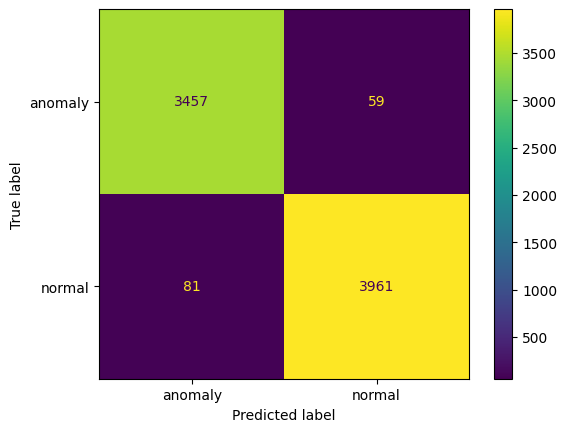

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Model=',knn)
print('Accuracy score=',accuracy_score(y_test,y_pred_knn))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_knn,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

In [ ]:
print(knn.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['anomaly']


**Support Vector Classifier(SVC)**

Model= SVC(kernel='poly')
Accuracy Score 0.9695686689600423
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9824    0.9516    0.9668      3516
      normal     0.9591    0.9852    0.9719      4042

    accuracy                         0.9696      7558
   macro avg     0.9707    0.9684    0.9694      7558
weighted avg     0.9699    0.9696    0.9695      7558



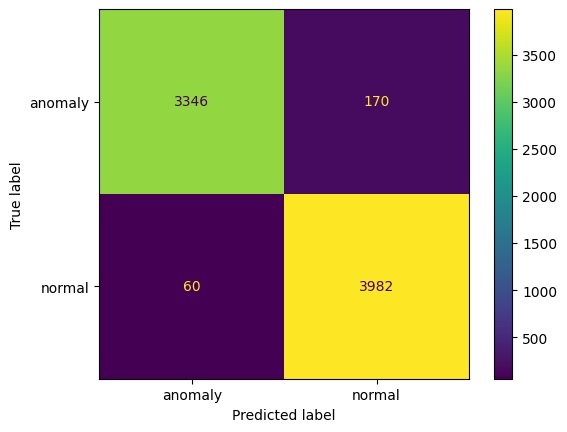

In [ ]:
from sklearn.svm import SVC
sv=SVC(kernel='poly')
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
print('Model=',sv)
print("Accuracy Score",accuracy_score(y_test,y_pred_sv))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_sv,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
print(sv.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['normal']


**Naive bayes- Gaussian Classifier**

Model= GaussianNB()
Accuracy Score 0.9011643291876158
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9380    0.8433    0.8881      3516
      normal     0.8747    0.9515    0.9115      4042

    accuracy                         0.9012      7558
   macro avg     0.9063    0.8974    0.8998      7558
weighted avg     0.9041    0.9012    0.9006      7558



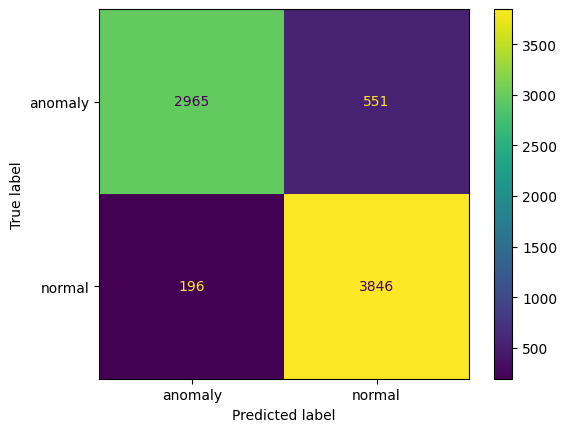

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print('Model=',nb)
print('Accuracy Score',accuracy_score(y_test,y_pred_nb))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_nb,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

In [ ]:
print(nb.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['anomaly']


**Logistics Regression**

Model= LogisticRegression()
Accuracy Score 0.9317279703625297
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9462    0.9047    0.9250      3516
      normal     0.9202    0.9552    0.9374      4042

    accuracy                         0.9317      7558
   macro avg     0.9332    0.9300    0.9312      7558
weighted avg     0.9323    0.9317    0.9316      7558



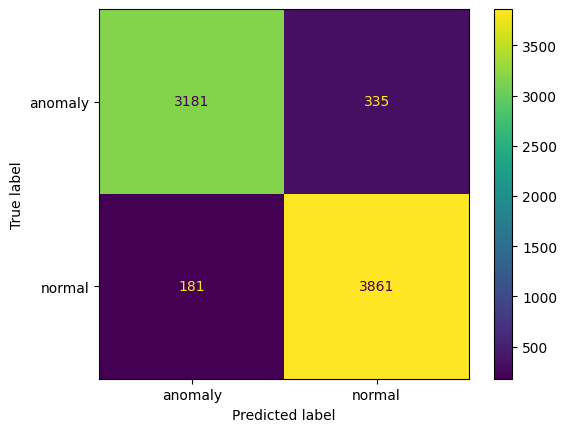

In [ ]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(x_train,y_train)
y_pred_logi=logi.predict(x_test)
print('Model=',logi)
print('Accuracy Score',accuracy_score(y_test,y_pred_logi))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_logi,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logi))

In [ ]:
print(logi.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['anomaly']


**Decision tree CLassifier**

Model= DecisionTreeClassifier(criterion='entropy')
Accuracy Score 0.9960306959513099
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9952    0.9963    0.9957      3516
      normal     0.9968    0.9958    0.9963      4042

    accuracy                         0.9960      7558
   macro avg     0.9960    0.9960    0.9960      7558
weighted avg     0.9960    0.9960    0.9960      7558



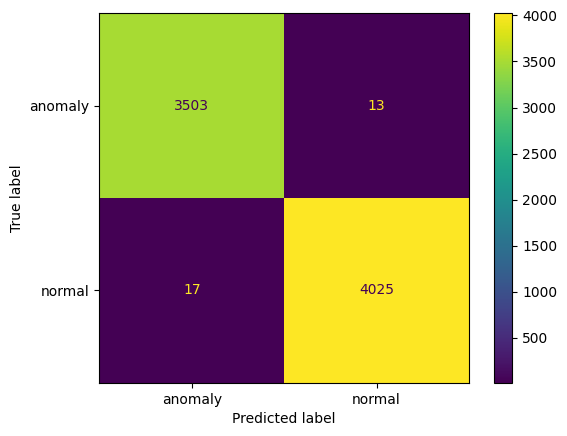

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
deci=DecisionTreeClassifier(criterion='entropy')
deci.fit(x_train,y_train)
y_pred_deci=deci.predict(x_test)
print('Model=',deci)
print('Accuracy Score',accuracy_score(y_test,y_pred_deci))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_deci,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_deci))

In [ ]:
print(deci.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['anomaly']


[Text(0.42367788461538464, 0.9705882352941176, 'dst_bytes <= -0.01\nentropy = 0.997\nsamples = 17634\nvalue = [8227, 9407]\nclass = anomaly'),
 Text(0.1543803418803419, 0.9117647058823529, 'diff_srv_rate <= -0.377\nentropy = 0.413\nsamples = 8173\nvalue = [7494, 679]\nclass = normal'),
 Text(0.0641025641025641, 0.8529411764705882, 'same_srv_rate <= -0.69\nentropy = 0.011\nsamples = 6100\nvalue = [6094, 6]\nclass = normal'),
 Text(0.042735042735042736, 0.7941176470588235, 'count <= -0.039\nentropy = 0.65\nsamples = 24\nvalue = [20, 4]\nclass = normal'),
 Text(0.02564102564102564, 0.7352941176470589, 'flag <= -0.71\nentropy = 0.286\nsamples = 20\nvalue = [19, 1]\nclass = normal'),
 Text(0.017094017094017096, 0.6764705882352942, 'dst_host_same_srv_rate <= -0.724\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = normal'),
 Text(0.008547008547008548, 0.6176470588235294, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = anomaly'),
 Text(0.02564102564102564, 0.6176470588235294, 'entro

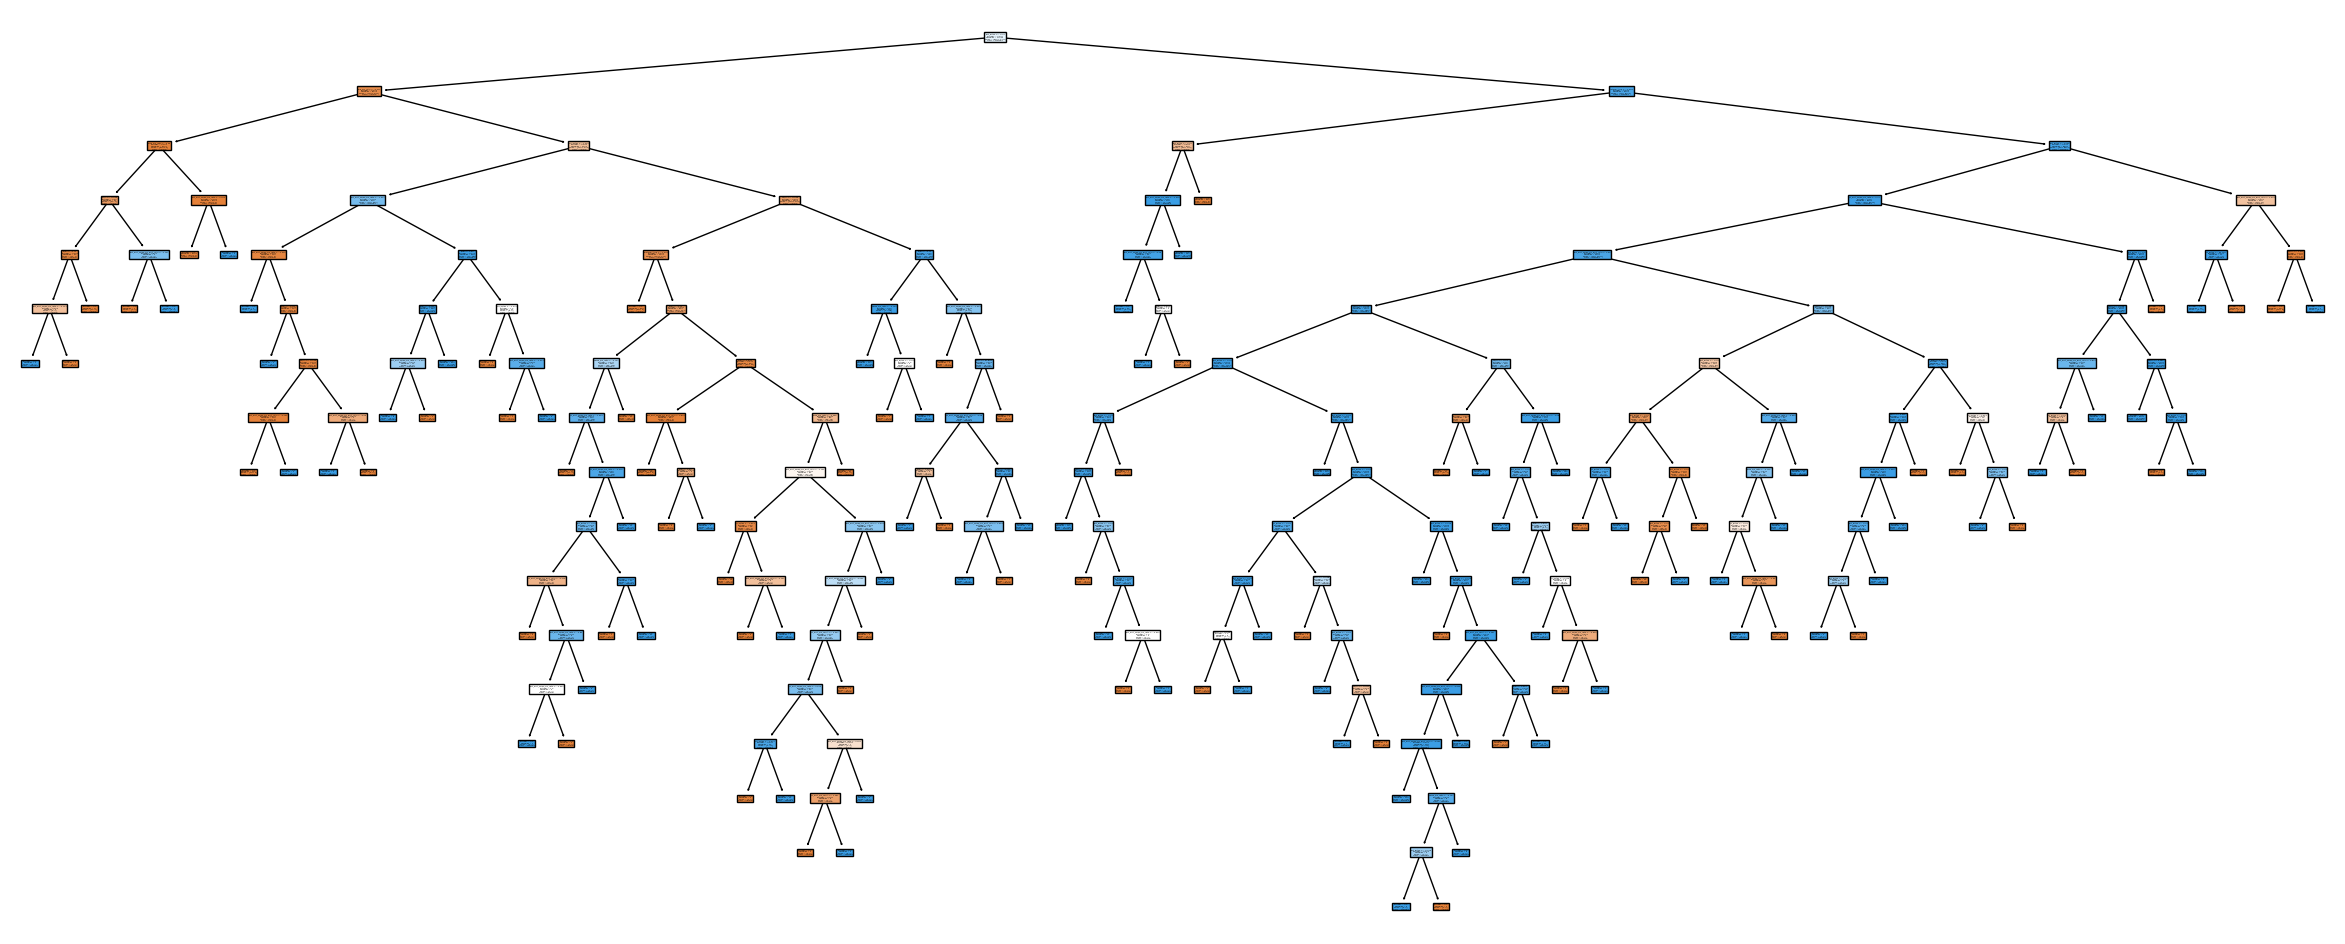

In [ ]:
plt.figure(figsize=(30,12))
tree.plot_tree(deci,feature_names=['protocol_type','flag','src_bytes','dst_bytes','count', \
                                    'same_srv_rate','diff_srv_rate','dst_host_srv_count', \
                                    'dst_host_same_srv_rate','dst_host_same_src_port_rate'],class_names=['normal','anomaly'],filled=True)

**RANDOM FOREST CLASSIFIER**

Model= RandomForestClassifier(n_estimators=50, random_state=42)
Accuracy score 0.997618417570786
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9977    0.9972    0.9974      3516
      normal     0.9975    0.9980    0.9978      4042

    accuracy                         0.9976      7558
   macro avg     0.9976    0.9976    0.9976      7558
weighted avg     0.9976    0.9976    0.9976      7558



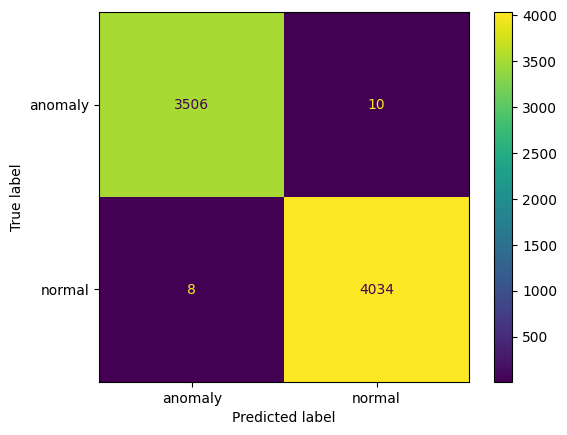

In [ ]:
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("Model=",rf)
print("Accuracy score",accuracy_score(y_test,y_pred_rf))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_rf,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

In [ ]:
print(rf.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['normal']


**ADA BOOST CLASSIFIER**

Model= RandomForestClassifier(n_estimators=50, random_state=42)
Accuracy score= 0.9841227838052394
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9868    0.9790    0.9829      3516
      normal     0.9818    0.9886    0.9852      4042

    accuracy                         0.9841      7558
   macro avg     0.9843    0.9838    0.9840      7558
weighted avg     0.9841    0.9841    0.9841      7558



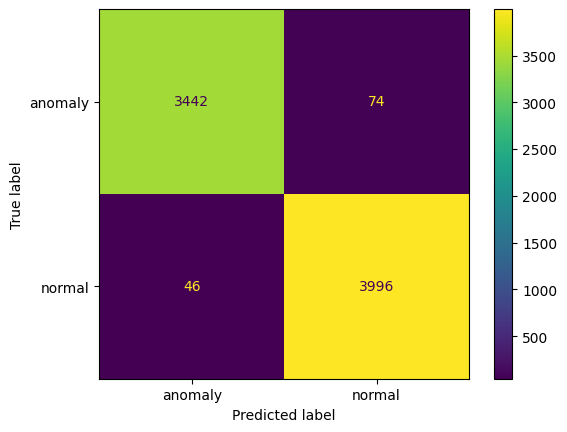

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print("Model=",rf)
print('Accuracy score=',accuracy_score(y_test,y_pred_ab))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_ab,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ab))

In [ ]:
print(ab.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['normal']


**LGBM CLASSIFIER**

[LightGBM] [Info] Number of positive: 9407, number of negative: 8227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533458 -> initscore=0.134033
[LightGBM] [Info] Start training from score 0.134033
Model= LGBMClassifier()
Accuracy Score= 0.9974861074358295
**************************************************
Classification Report
              precision    recall  f1-score   support

     anomaly     0.9969    0.9977    0.9973      3516
      normal     0.9980    0.9973    0.9976      4042

    accuracy                         0.9975      7558
   macro avg     0.9974    0.9975    0.9975      7558
weighted avg     0.9975    0.9975    0.997

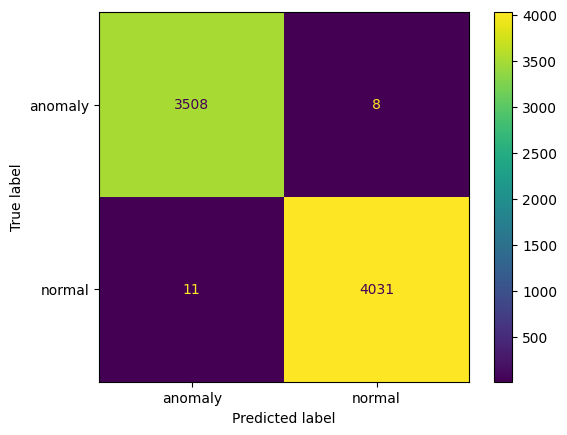

In [ ]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
y_pred_lgbm=lgbm.predict(x_test)
print("Model=",lgbm)
print('Accuracy Score=',accuracy_score(y_test,y_pred_lgbm))
print('*'*50)
print('Classification Report')
print(classification_report(y_test,y_pred_lgbm,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lgbm))

In [ ]:
print(lgbm.predict([[1,2,4,0,0,229,0.04,0.06,10,0]]))

['normal']


**CONCLUSION**

* The problem statement was to detect whether given network traffic is normal or malicious.

* There are 3 categorical features and 38 numerical features.

* Then dataset is then split into train,test.

* Then categorical features are encoded using Label encoding whereas numerical features are normalized.

* All the models are performing really well. Best model is Random forest and lgbm classifier

* Models are not overfitting as train and test accuracy is almost the same.

* Top features are selected using of RFE. We get improved accuracy.

* From Confusion Matrix we conclude that we have successfully classified Normal Network Traffic and Malicious Network Traffic with 99.97% accuracy.